In [1]:
import os 
import warnings 
warnings.filterwarnings('ignore')


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima import auto_arima


from sklearn.metrics import mean_absolute_error , mean_squared_error

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

from nsepy import get_history 
from datetime import date 

In [2]:
sbin = get_history(symbol='SBIN',
                   start=date(2000,1,1),
                   end=date(2020,11,1))

In [3]:
sbin.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


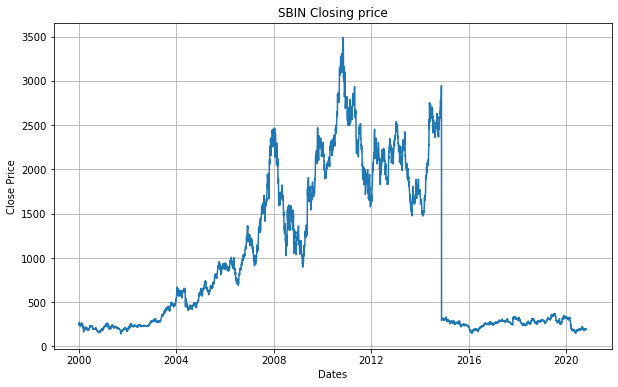

In [4]:
plt.figure(figsize = (10,6))
plt.grid('True')
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.plot(sbin['Close'])
plt.title('SBIN Closing price')
plt.show()

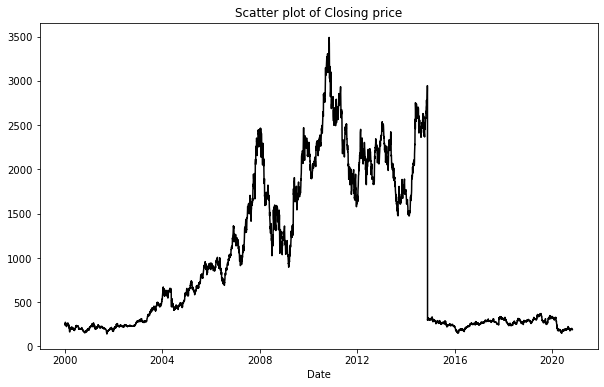

In [5]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style = 'k')
plt.title('Scatter plot of Closing price')
plt.show()

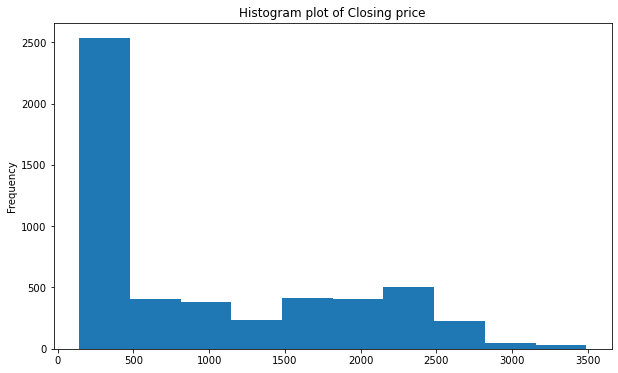

In [6]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style = 'k' , kind = 'hist')
plt.title('Histogram plot of Closing price')
plt.show()

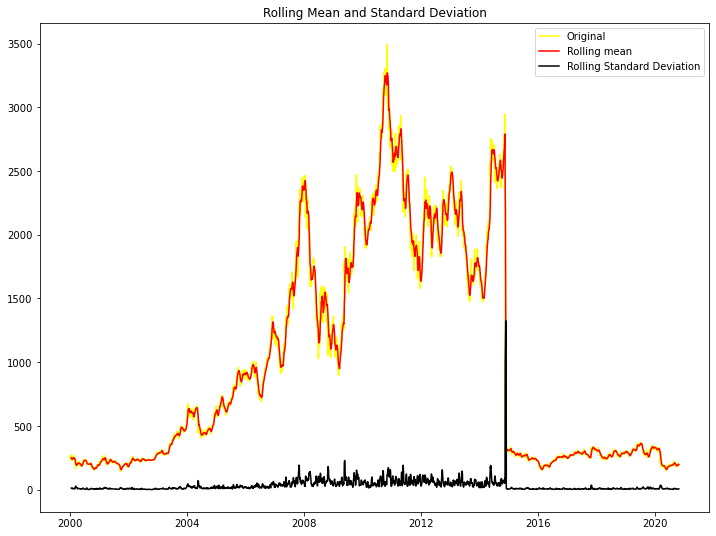

These are the results of dickey fuller tests
Test Statistics                 -1.914523
P-Value                          0.325260
Number of lags used              3.000000
Number of observation used    5183.000000
critical value (1%)             -3.431612
critical value (5%)             -2.862098
critical value (10%)            -2.567067
dtype: float64


In [7]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plotting rolling statistics 
    plt.figure(figsize = (12,9))
    plt.plot(timeseries , color = 'yellow' , label = 'Original')
    plt.plot(rolmean , color = 'red' , label = 'Rolling mean')
    plt.plot(rolstd , color = 'black' , label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = 'False')
    
    print('These are the results of dickey fuller tests')
    
    adft = adfuller(timeseries , autolag = 'AIC')
    
    '''Output of dft will give us without defining what the values are 
    hence we manually write the value it explains with a for loop'''
    
    
    output = pd.Series(adft[0:4] , index = ['Test Statistics','P-Value', 'Number of lags used', 
                                           'Number of observation used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values 
    print(output)
    

test_stationarity(sbin['Close'])

<Figure size 432x288 with 0 Axes>

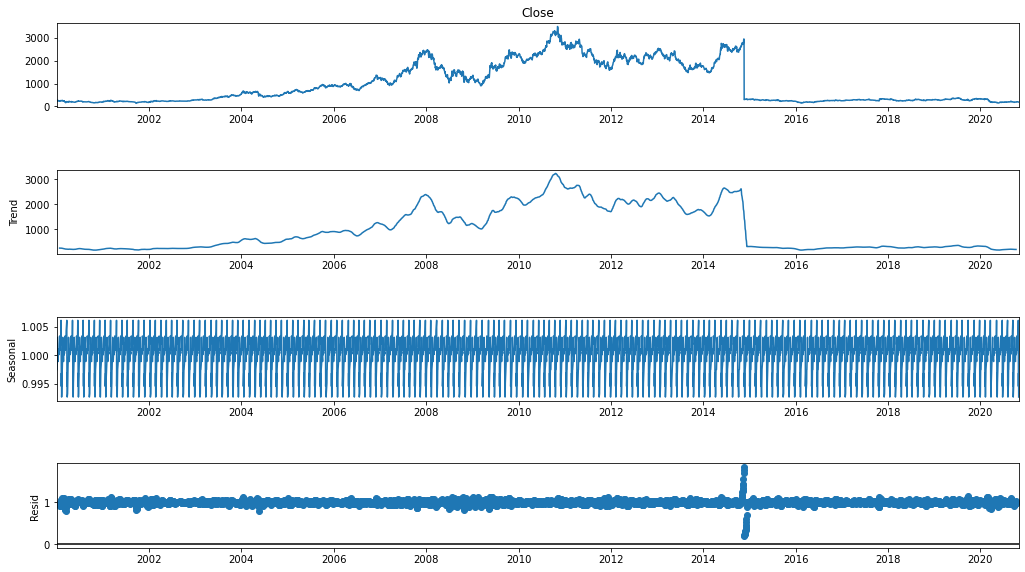

In [8]:
result = seasonal_decompose(df_close , model = 'multiplicative' , freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No handles with labels found to put in legend.


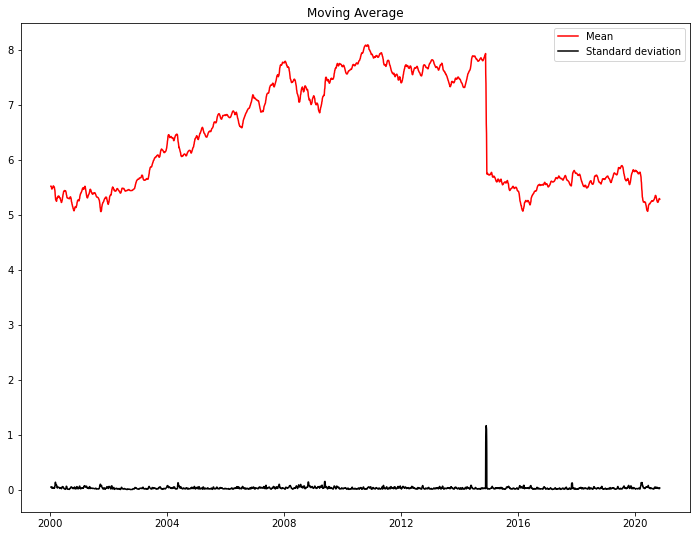

In [9]:
plt.figure(figsize=(12,9))
df_log = np.log(sbin['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.plot(moving_avg , color = 'red' , label = 'Mean')
plt.plot(std_dev , color = 'black' , label = 'Standard deviation')

plt.legend()
plt.show()

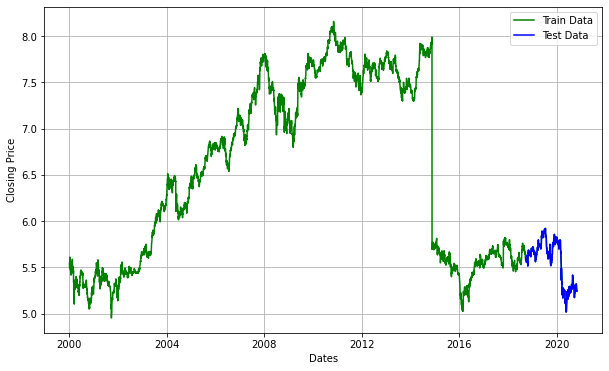

In [10]:
train_data , test_data = df_log[3:int(len(df_log)*0.9)] , df_log[int(len(df_log)*0.9) :]
plt.figure(figsize=(10,6))
plt.grid('True')
plt.xlabel('Dates')
plt.ylabel('Closing Price')

plt.plot(df_log , 'green' ,label = 'Train Data')
plt.plot(test_data , 'blue', label = 'Test Data')
plt.legend()

In [11]:
model_autoARIMA = auto_arima(train_data , start_p = 0 , start_q = 0,
                            test = 'adf', #Using ADF test to find optimal d
                            max_p = 3 , max_q = 3, #maximum p & q
                            m =1, #Frequnecy of series
                            d = None, #Let model determine d 
                            seasonal = False , #No Seasonality
                            start_P = 0, 
                            D = 0,
                            trace = True, 
                            error_action = 'ignore', 
                            suppress_warnings= True,
                            stepwise= True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16607.561, Time=2.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16607.961, Time=0.92 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16608.035, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16609.560, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16606.477, Time=4.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.908 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4665
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8305.780
Date:                Mon, 30 Nov 2020   AIC                         -16609.560
Time:                        01:44:34   BIC                         -16603.113
Sample:                             0   HQIC                        -16607.293
                               - 4665                            

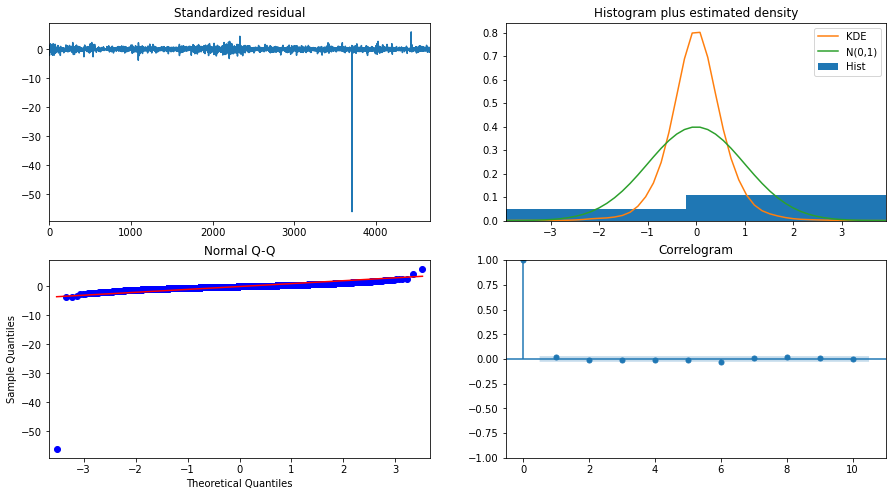

In [12]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [13]:
model = ARIMA(train_data , order=(3,1,2))
fitted = model.fit(disp = -1)
print(fitted.summary())

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4664
Model:                 ARIMA(3, 1, 2)   Log Likelihood                8308.610
Method:                       css-mle   S.D. of innovations              0.041
Date:                Mon, 30 Nov 2020   AIC                         -16603.221
Time:                        01:44:38   BIC                         -16558.087
Sample:                             1   HQIC                        -16587.346
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.202e-06      0.001      0.016      0.987      -0.001       0.001
ar.L1.D.Close     0.2794        nan        nan        nan         nan         nan
ar.L2.D.Close     0.3045        nan     

# Forecasting 

In [14]:
fc, se,conf = fitted.forecast(519 , alpha = 0.05 )

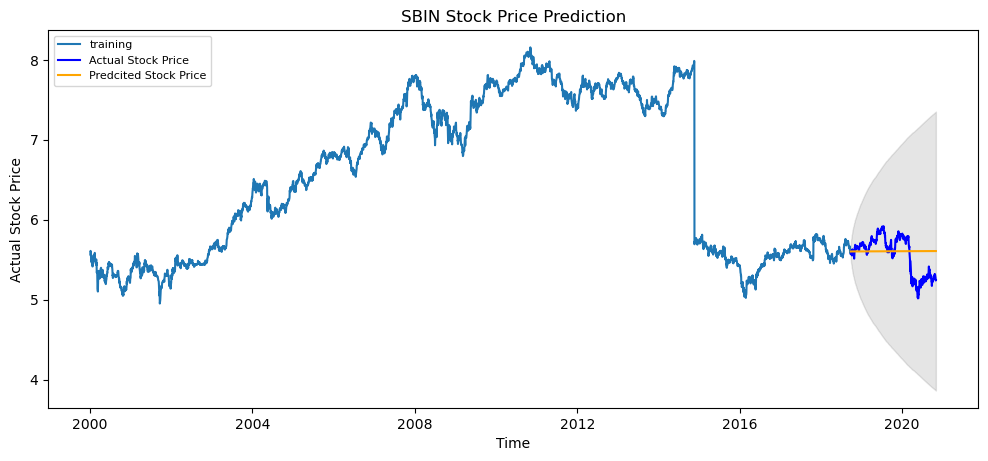

In [15]:
fc_series = pd.Series(fc , index = test_data.index)
lower_series = pd.Series(conf[:,0] , index = test_data.index)
upper_series = pd.Series(conf[:,1] , index = test_data.index)

plt.figure(figsize=(12,5) , dpi = 100)
plt.plot(train_data , label = 'training')
plt.plot(test_data , color = 'blue' , label = 'Actual Stock Price')
plt.plot(fc_series , color = 'orange' , label = 'Predcited Stock Price')
plt.fill_between(lower_series.index , lower_series , upper_series, 
                 color = 'k' , alpha = .10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc = 'upper left' , fontsize = 8)
plt.show()